# Init connection

In [1]:
import iris, irisnative
import time, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

connection = iris.connect("iris:1972/SDF", "_SYSTEM", "SYS")
irispy = irisnative.createIris(connection)

# Open object & invoke methods

In [4]:
obj = irispy.classMethodObject("sdf.data.Patient","%OpenId",1)
jsonString = iris.IRISReference(None);
obj.invoke("%JSONExportToString", jsonString)
jsonString.getValue()

'{"Id":"1","Identifier":"679190","FirstName":"Zeke","LastName":"Brian","AdministrativeSex":"M","BirthDate":"1983-01-20","Age":40,"Observations":["1","2","3","4","5","3962","3963","3964","3965","3966"]}'

# Run SQL queries

```sql
SELECT * FROM sdf_data.Observation
```

In [3]:
data = pd.read_sql_query("SELECT * FROM sdf_data.Observation", connection)
data

,ID,Code,Identifier,Patient,Status,TimeStamp,Units,ValueNM,ValueST
0,1,BloodGlucose,None,1,F,2022-10-03 07:11:02,mmol/L,15.00,None
1,2,BodyTemp,None,1,F,2022-10-03 07:11:02,C,36.67,None
2,3,DiastolicBP,None,1,F,2022-10-03 07:11:02,mmHg,85.00,None
3,4,HeartRate,None,1,F,2022-10-03 07:11:02,bpm,60.00,None
4,5,SystolicBP,None,1,F,2022-10-03 07:11:02,mmHg,120.00,None
...,...,...,...,...,...,...,...,...,...
4240,4241,BodyTemp,None,689,F,2022-11-23 06:16:41,C,36.67,None
4241,4242,DiastolicBP,None,689,F,2022-11-23 06:16:41,mmHg,100.00,None
4242,4243,HeartRate,None,689,F,2022-11-23 06:16:41,bpm,66.00,None
4243,4244,RiskLevel,None,689,F,2022-11-23 06:16:41,risk,NaN,high risk


# Stats for BloodGlucose

In [6]:
values = np.array(data.loc[(data.Code == "BloodGlucose")]['ValueNM'])

print("Mean value:       ", values.mean())
print("Standard deviation:", values.std())
print("Minimum values:    ", values.min())
print("Maximum values:    ", values.max())

print("25th percentile:   ", np.percentile(values, 25))
print("Median:            ", np.median(values))
print("75th percentile:   ", np.percentile(values, 75))

Mean value:        8.771178756476685
Standard deviation: 3.301102859230095
Minimum values:     6.0
Maximum values:     19.0
25th percentile:    6.9
Median:             7.5
75th percentile:    8.0


# BloodGlucose Distribution

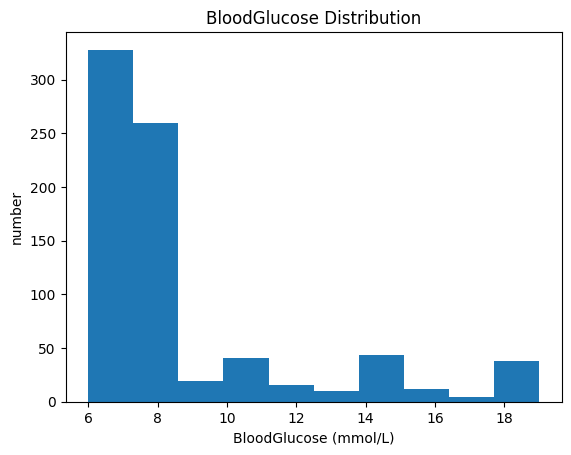

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(values)
plt.title('BloodGlucose Distribution')
plt.xlabel('BloodGlucose (mmol/L)')
plt.ylabel('number');